In [42]:
from autograd import numpy as np
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from autograd import grad
from sklearn.datasets import fetch_mldata
import random
mnist = fetch_mldata('MNIST original')

# strip off input / output pairs
x = mnist.data.T
y = mnist.target[np.newaxis,:]


num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y = y[:,inds]
x_mean = np.mean(x_sample,axis = 0);
x_std = np.std(x_sample,axis = 0);
x = (x_sample - x_mean) / (x_std + 0.000001)


def gradient_descent(g,alpha,max_its,w):

    gradient = grad(g)
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    wrong_his = [count_wrong(w)]
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha * grad_eval
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        wrong_his.append(min(count_wrong(w),min(wrong_his)))
    return weight_history,cost_history,wrong_his  
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

def multiclass_perceptron(w):
    # pre-compute predictions on all points
    all_evals = model(x,w)
    all_evals_tmp = np.exp(all_evals)
    # compute maximum across data points
    a = np.log(np.sum(all_evals_tmp,axis = 0))
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + 0.000001*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

def count_wrong(w):
    pre = model(x,w)
    return np.where(np.argmax(pre,axis=0) != y[0])[0].shape[0]
N = x.shape[0]
C = len(np.unique(y))
w = 0.1*np.random.randn(N+1,C)#initialize weights

alpha = 0.1
max_its = 100
weight_his,cost_his,wrong_his = gradient_descent(multiclass_perceptron,alpha,max_its,w)#standard_result

In [43]:
import data_transformer
x = data_transformer.edge_transformer(x)

In [44]:
N = x.shape[0]
w = 0.1*np.random.randn(N+1,C)
alpha = 0.1
weight_his1,cost_his1,wrong_his1 = gradient_descent(multiclass_perceptron,alpha,max_its,w)#standard_result

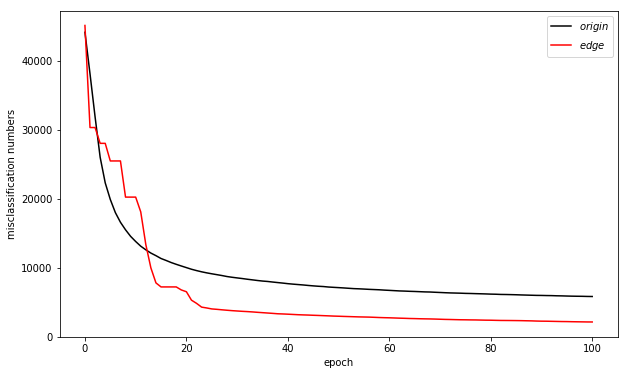

In [45]:
plt.figure(figsize = (10,6))
plt.plot([i for i in range(len(wrong_his))],wrong_his,'black')
plt.plot([i for i in range(len(wrong_his1))],wrong_his1,'r')
plt.ylabel('misclassification numbers')
plt.xlabel('epoch')
plt.legend(['$origin$','$edge$'])
plt.show()